# Introduction to machine learning - model training project
**Author: Tomasz Zając**

## Introduction

In [43]:
!pip install --upgrade gdown
!gdown https://drive.google.com/uc?id=1D0xACn1H6NNqzE4fxNSA8uLrTGCBBDq_
!gdown https://drive.google.com/uc?id=1HBmrPdMDtKSrrfmSnaKtv1A-E9STNaNG
!gdown https://drive.google.com/uc?id=1VmKd-Qc8ZBWLVsk1j00nlZiywf-eo0gr

Downloading...
From: https://drive.google.com/uc?id=1D0xACn1H6NNqzE4fxNSA8uLrTGCBBDq_
To: /content/X_test.csv
100% 33.3M/33.3M [00:00<00:00, 93.8MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1HBmrPdMDtKSrrfmSnaKtv1A-E9STNaNG
From (redirected): https://drive.google.com/uc?id=1HBmrPdMDtKSrrfmSnaKtv1A-E9STNaNG&confirm=t&uuid=847c5d9f-c305-48fa-b6ad-16ac1144aa19
To: /content/X_train.csv
100% 188M/188M [00:02<00:00, 87.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1VmKd-Qc8ZBWLVsk1j00nlZiywf-eo0gr
To: /content/y_train.csv
100% 77.8k/77.8k [00:00<00:00, 41.5MB/s]


## Data & library imports

In [112]:
# Principal libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm
import xgboost as xgb

# Additional features:
from scipy.stats import spearmanr
from sklearn.base import BaseEstimator
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, cross_val_score

To make this notebook more clear, we will use *X* and *Y* for the training set by default. Test set will be used only at the end.

In [46]:
X = pd.read_csv('X_train.csv')
Y = pd.read_csv('y_train.csv')
X_test = pd.read_csv('X_test.csv')

# **Task 1.:** Exploratory analysis

To start with, we will explore the training data set.

In [47]:
X

,LINC01409,LINC01128,LINC00115,FAM41C,KLHL17,HES4,ISG15,AGRN,C1orf159,TNFRSF18,...,MT-CO1,MT-ATP8,MT-CO3,MT-ND3,MT-ND4L,MT-ND4,MT-ND5,MT-ND6,MT-CYB,AL592183.1
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,3.481867,0.670474,3.692914,3.000882,0.670474,2.952204,2.156554,0.000000,3.000882,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.128261,0.0,0.0,0.0,...,3.177765,0.000000,3.409956,2.605772,1.128261,2.986313,1.644912,0.000000,2.605772,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.592221,0.0,0.0,0.0,...,4.052827,0.592221,3.641997,2.574137,0.592221,3.054001,1.230809,0.592221,2.932579,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,3.456359,0.000000,3.108968,2.332478,0.657698,2.705056,1.884349,0.000000,2.498491,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,3.218622,0.000000,3.298798,2.436419,0.714519,3.131454,1.827129,0.000000,3.035955,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3789,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,3.523738,0.000000,4.474665,3.431372,0.000000,4.004680,3.088463,1.384268,4.508187,0.0
3790,0.0,0.0,0.0,0.0,0.0,0.0,1.058788,0.0,0.0,0.0,...,3.702298,1.561455,4.309887,2.987133,0.000000,3.309091,2.343187,0.000000,3.496776,0.0
3791,0.0,0.0,0.0,0.0,0.0,0.0,1.287546,0.0,0.0,0.0,...,3.396611,0.000000,4.237304,2.441959,1.832224,3.760785,2.182861,1.287546,3.928955,0.0
3792,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,3.083760,1.126239,3.473845,2.983474,1.981292,3.335502,2.233893,0.000000,2.603002,0.0


As we can see, there are:

- 3794 observations,
- 9001 features.

Let's check if data types are correct:

In [48]:
train_data_types = X.dtypes.unique()

if len(train_data_types) == 1:
    print("All columns have the same data type:", train_data_types[0])
else:
    print("Columns have different data types:", train_data_types)

All columns have the same data type: float64


Let's look for missing values:

In [49]:
train_missing_values = X.isnull().sum()
train_columns_with_missing_values = train_missing_values[train_missing_values > 0]

if train_columns_with_missing_values.empty:
    print("There are no missing values in the dataset.")
else:
    print("Columns with missing values:")
    print(train_columns_with_missing_values)

There are no missing values in the dataset.


Seems like everything is correct. We can ensure that the test set is correct:

In [50]:
X_test

,LINC01409,LINC01128,LINC00115,FAM41C,KLHL17,HES4,ISG15,AGRN,C1orf159,TNFRSF18,...,MT-CO1,MT-ATP8,MT-CO3,MT-ND3,MT-ND4L,MT-ND4,MT-ND5,MT-ND6,MT-CYB,AL592183.1
0,0.912759,0.0,0.0,0.0,0.0,0.0,1.699929,0.0,0.0,0.000000,...,4.198888,0.912759,3.945464,2.938857,0.912759,3.085418,2.436968,0.912759,3.378698,0.000000
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,3.681173,0.000000,3.805979,3.309869,1.507967,2.922500,2.588620,0.000000,2.922500,1.014785
2,0.000000,0.0,0.0,0.0,0.0,0.0,2.152245,0.0,0.0,0.000000,...,3.842135,0.000000,4.082583,3.271361,0.000000,3.486884,1.803265,0.000000,3.318342,0.000000
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,3.009446,0.000000,3.895699,2.568605,0.000000,2.738070,1.761136,0.000000,3.009446,0.000000
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,4.069638,0.000000,4.069638,2.858697,1.116730,3.689932,1.116730,1.631140,3.522754,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,4.472111,0.945259,3.807937,3.378359,1.422375,4.157932,1.422375,0.945259,3.772392,0.000000
666,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,3.799598,0.860820,3.558984,2.855389,0.860820,3.597109,1.316462,0.000000,2.930996,0.000000
667,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.390675,...,3.834352,1.390675,3.337833,2.570338,1.390675,3.337833,2.949970,0.000000,3.532026,0.000000
668,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,3.398811,0.790888,3.067635,2.883401,1.761544,2.813587,2.108044,0.790888,3.223150,0.000000


Number of features is equal to the training set. Let's look for any problems:

In [51]:
test_data_types = X_test.dtypes.unique()

if len(test_data_types) == 1:
    print("All columns have the same data type:", test_data_types[0])
else:
    print("Columns have different data types:", test_data_types)

All columns have the same data type: float64


In [52]:
test_missing_values = X_test.isnull().sum()
test_columns_with_missing_values = test_missing_values[test_missing_values > 0]

if test_columns_with_missing_values.empty:
    print("There are no missing values in the dataset.")
else:
    print("Columns with missing values:")
    print(test_columns_with_missing_values)

There are no missing values in the dataset.


Looks good, we can move on to the endogenous variable.

In [53]:
Y

,Id,Expected
0,0,1.741679
1,1,0.000000
2,2,1.422289
3,3,1.675446
4,4,1.531687
...,...,...
3789,3789,0.000000
3790,3790,0.000000
3791,3791,0.477747
3792,3792,0.661569


Vector of endogenous variable's values has length of 3794, which is equal to the number of observations.

Let's explore this variable a bit more:

In [54]:
Y_values = Y['Expected']
Y_values.describe()

count    3794.000000
mean        1.143673
std         0.770174
min         0.000000
25%         0.296568
50%         1.404803
75%         1.783414
max         2.627595
Name: Expected, dtype: float64

We can also create some plots:

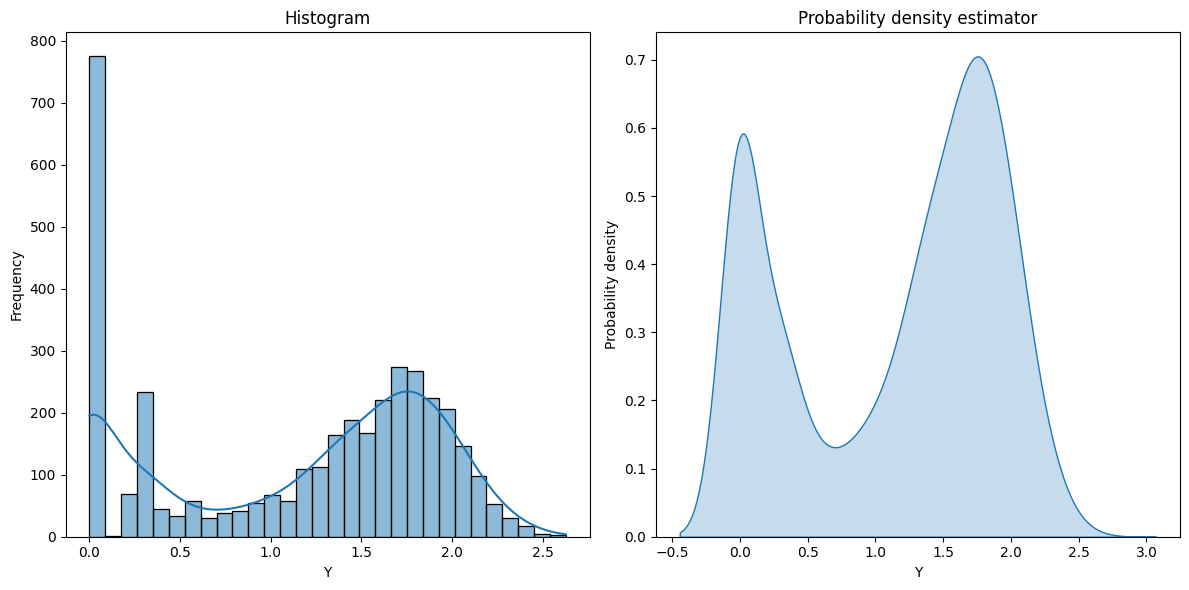

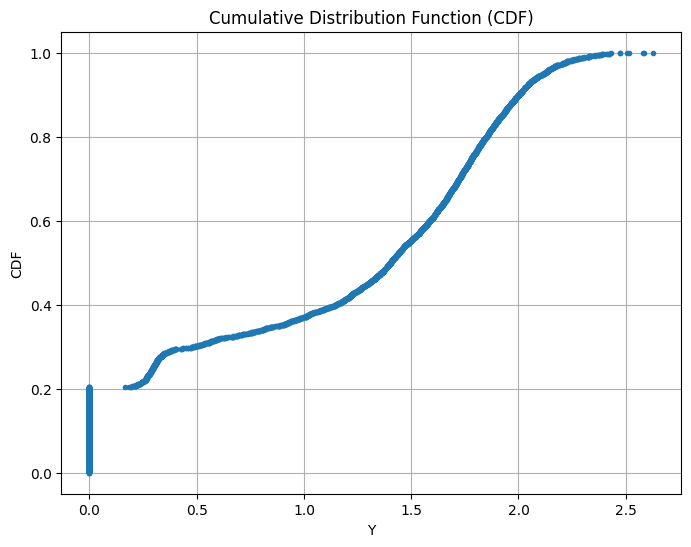

In [55]:
plt.figure(figsize=(12, 6))

# Histogram:
plt.subplot(1, 2, 1)
sns.histplot(Y_values, bins=30, kde=True)
plt.title('Histogram')
plt.xlabel('Y')
plt.ylabel('Frequency')

# Density plot:
plt.subplot(1, 2, 2)
sns.kdeplot(Y_values, fill=True)
plt.title('Probability density estimator')
plt.xlabel('Y')
plt.ylabel('Probability density')

plt.tight_layout()
plt.show()

# CDF:
plt.figure(figsize=(8, 6))
sorted_data = np.sort(Y_values)
cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
plt.plot(sorted_data, cdf, marker='.', linestyle='none')
plt.title('Cumulative Distribution Function (CDF)')
plt.xlabel('Y')
plt.ylabel('CDF')

plt.grid(True)
plt.show()

**Conclusion:** The target variable is equal to 0 for many observations. The reason may be typical for the experiment - the chosen surface protein wasn't detected in these observations. We don't have the information about all observed proteins, so we can only expect that generally there are lots of different types that were detected in these observations, but not CD36.

Non-zero values (and larger than 0.5) seem to be distributed normally, but with "heavier" left tail, so it's only an approximation. This observation is only a fun-fact; we rather won't use this property anywhere else.

The last thing that we need to perform in this task are correlation coefficients. We will calculate Spearman's coefficients, because we don't expect linear correlations in general - rank correlation is sufficient here.

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


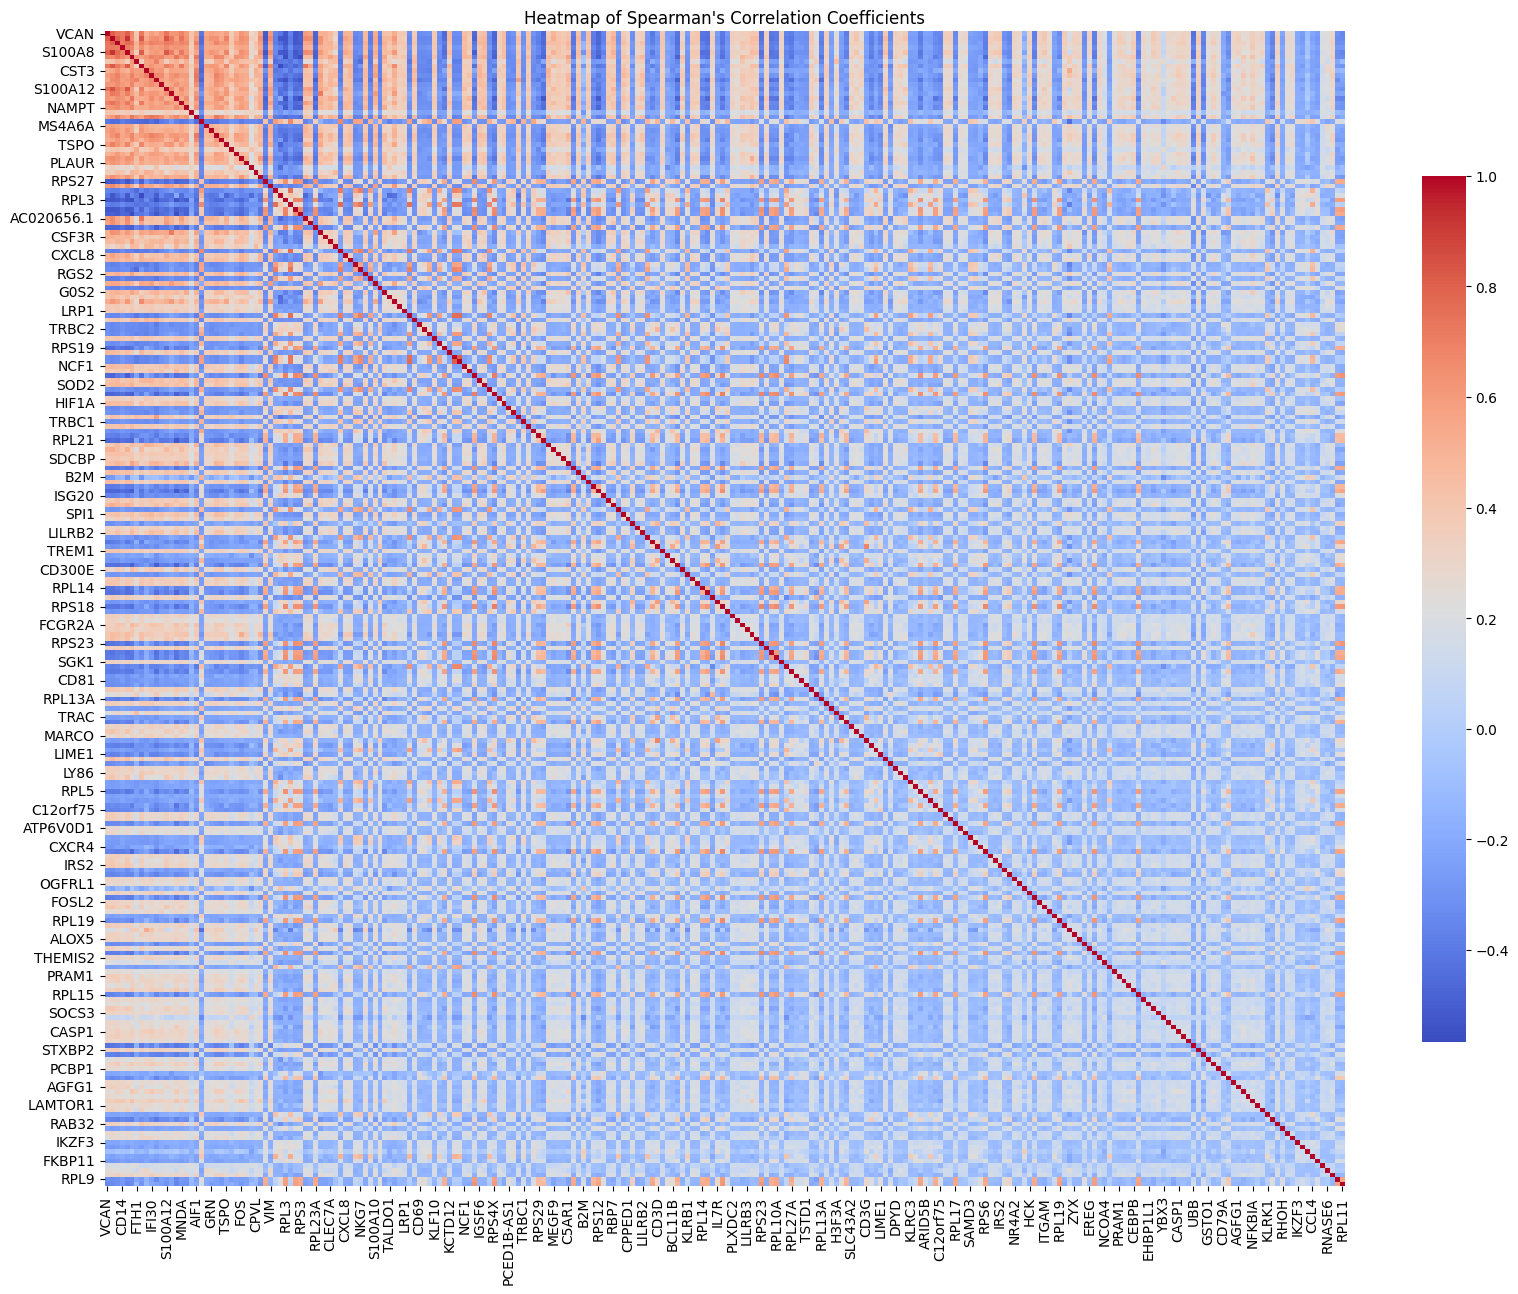

In [56]:
spearman_correlations = X.apply(lambda x: spearmanr(x, Y_values)[0])

# 250 best correlated features:
most_correlated_features = spearman_correlations.abs().nlargest(250).index
X_selected = X[most_correlated_features]

correlation_matrix = X_selected.corr(method='spearman')

# Heatmap:
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt='.2f', cbar_kws={"shrink": .75})
plt.title("Heatmap of Spearman's Correlation Coefficients")
plt.show()

As we can see - there exist correlations between features. In a top-left corner we can observe pairs with the biggest correlation coefficients. These dependencies may affect later steps - for example regression with ElasticNet.

During later steps I encountered something weird - some columns in X and X_test have one and the same value:

In [57]:
unique_counts = X.nunique()
same_value_columns_X = unique_counts[unique_counts == 1].index.tolist()
print("Columns with the same value everywhere:", same_value_columns_X)
print("Number:", len(same_value_columns_X))

X.loc[:, same_value_columns_X]

Columns with the same value everywhere: ['DUOX1']
Number: 1


,DUOX1
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
3789,0.0
3790,0.0
3791,0.0
3792,0.0


In [58]:
unique_counts = X_test.nunique()
same_value_columns_X_test = unique_counts[unique_counts == 1].index.tolist()
print("Columns with the same value everywhere:", same_value_columns_X_test)
print("Number:", len(same_value_columns_X_test))
if 'DUOX1' in same_value_columns_X_test:
  print("DUOX1 also has only zeros.\n")
else:
  print("DUOX1 has non-zero values in X_test.\n")

X_test.loc[:, same_value_columns_X_test]

Columns with the same value everywhere: ['KLHL17', 'ATAD3C', 'PLCH2', 'AL020997.5', 'AZIN2', 'HPCAL4', 'TTC22', 'WDR78', 'DIPK1A', 'AL109741.1', 'TRIM46', 'AL592295.4', 'ERVMER61-1', 'AC108488.3', 'GRHL1', 'UCN', 'AC019129.2', 'AC079807.1', 'RAB11FIP5', 'IGKV4-1', 'SCN3A', 'CHN1', 'LHFPL4', 'AC090948.3', 'LRRC2', 'C3orf18', 'C3orf52', 'AC074044.1', 'ZBTB20-AS4', 'SLC35G2', 'AC078802.1', 'AC024560.4', 'AC139887.4', 'WFS1', 'LINC00504', 'BMP3', 'AC026801.2', 'AC093297.2', 'AC091982.3', 'AC008378.1', 'AL138824.1', 'AL009179.1', 'PI16', 'AL596202.1', 'ABCB4', 'SGCE', 'PPP1R9A', 'GAL3ST4', 'AF131215.2', 'MTMR7', 'NPM2', 'AL928970.1', 'INSL6', 'AL353743.2', 'AL590705.1', 'ZNF883', 'MIR181A2HG', 'HMGA1P4', 'AL512770.1', 'SORBS1', 'AL391684.1', 'AL162274.1', 'MIR210HG', 'AC006299.1', 'LINC02696', 'AP000487.1', 'CAPN5', 'DLG2', 'BACE1-AS', 'ESAM', 'AP003327.2', 'IGSF9B', 'AC022364.1', 'AC139768.1', 'BEST3', 'CSRP2', 'AC009522.1', 'SYCP3', 'C12orf42', 'TSC22D1-AS1', 'LINC00402', 'MCF2L', 'MCF2L-

,KLHL17,ATAD3C,PLCH2,AL020997.5,AZIN2,HPCAL4,TTC22,WDR78,DIPK1A,AL109741.1,...,AP000704.1,AP001059.3,AP001059.2,AC245060.6,AC004832.6,Z82206.1,INE1,CCDC120,AC233976.1,ARMCX2
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
666,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Turns out there is a column such as *DUOX1* that provides no information - it is a feature that can be ommited in a model.

There are 130 columns in a test set that have only zeros. We don't need to remove them, because we will perform PCA anyway, but they also don't need to be scaled. If we try to scale them to perform PCA properly, we divide by 0, because these columns have zero standard deviation.

# **Dimensionality reduction**

A model with this number of features is impossible to process in an acceptable time, so we have to perform dimensionality reduction.

In [81]:
# Scale both X and X_test:
X_scaled = X.copy()
X_test_scaled = X_test.copy()

for col in X_scaled:
  col1 = X_scaled[col]
  col2 = X_test_scaled[col]
  long_column = pd.concat([col1, col2], ignore_index=True)
  mean = long_column.mean()
  std = long_column.std()
  if std != 0:
    X_scaled[col] = (X_scaled[col] - mean) / std
    X_test_scaled[col] = (X_test_scaled[col] - mean) / std

In [82]:
# Initialize PCA and fit to the training data:
pca = PCA(n_components=500)
pca.fit(X_scaled)

# Transform the data:
X_pca = np.ascontiguousarray(pca.transform(X_scaled))
X_test_pca = np.ascontiguousarray(pca.transform(X_test_scaled))

In [83]:
X_transformed = pd.DataFrame(X_pca)
X_test_transformed = pd.DataFrame(X_test_pca)
X_transformed

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,-9.735531,1.402459,-3.440532,0.357419,-2.674222,-1.516304,2.443029,2.665829,-1.843567,-0.814350,...,-0.977542,1.275036,0.195473,0.651028,2.067207,1.554120,-0.339124,-1.802393,-0.944602,-0.440319
1,6.549140,-7.276501,12.050857,-9.130444,3.409866,-10.384420,-4.374945,3.015694,-2.493309,2.079633,...,0.176809,-0.660697,-1.173146,0.739729,1.732300,1.316058,2.502096,6.099277,-0.083961,0.695656
2,-11.498629,1.152519,-5.155844,-0.713560,1.259245,1.569408,0.946174,-0.456216,-0.225759,-1.014820,...,0.621546,-1.334861,-0.852435,0.303616,-2.499968,0.425869,2.350769,0.811579,0.691732,-0.376824
3,-3.004241,-1.266663,-5.976333,3.612151,-5.689120,-2.553387,2.722296,1.780620,-7.631593,0.803888,...,-0.061359,1.406539,3.080970,-1.025854,-0.236321,0.571995,0.243943,-0.003670,2.136479,0.498610
4,11.629120,-7.419765,-3.941993,21.085860,10.131697,-10.635843,5.502333,-5.992086,-1.386432,-1.532039,...,0.467219,-1.759164,1.180522,2.310346,-3.677791,0.645596,1.559304,0.447313,1.238059,-1.772770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3789,9.524685,-7.068288,2.680148,12.585877,1.025719,4.514434,4.763630,21.119996,16.099952,-5.430098,...,-2.461753,1.761310,-0.763093,-0.199002,3.854885,-1.215712,4.077336,-0.370097,3.091185,3.706146
3790,8.394819,-10.879805,11.265289,-9.569784,5.120470,-6.774654,-2.764416,1.465478,-2.354096,3.871865,...,0.113876,4.418059,-2.517581,0.707306,3.526531,-1.565381,-2.070743,-3.277363,-4.850807,0.004033
3791,12.927368,-11.384388,9.765463,-5.731501,-2.240418,7.384740,6.664417,-8.062059,5.597976,-2.630359,...,3.760315,1.937146,-4.021443,2.339945,0.090621,-0.268285,-0.330273,2.474050,-1.599910,1.576115
3792,0.870388,2.336367,-4.875976,-1.191859,-1.695049,-2.250015,-6.274993,-1.957430,7.708004,0.108448,...,-3.579800,-4.238413,-1.960662,-1.475714,-1.508832,0.346779,4.563013,-0.895494,-2.908352,-1.222915


Explained variance ratio:
 [0.0149249  0.0111419  0.00862077 0.00486665 0.0034176  0.00324757
 0.00277292 0.00250883 0.00235928 0.00203969 0.00181779 0.0017436
 0.00165422 0.00158926 0.00148068 0.00142576 0.00141828 0.00126806
 0.00122199 0.00121281 0.00119668 0.00116335 0.00113123 0.00111125
 0.00110069 0.00107976 0.00105773 0.0010345  0.00102424 0.00102149
 0.00101049 0.00100148 0.00098843 0.00097858 0.00097211 0.0009655
 0.00095814 0.00095267 0.00094883 0.00093974 0.00093656 0.00093405
 0.00093011 0.00091164 0.00090452 0.00089845 0.00089744 0.00089379
 0.0008853  0.00088219 0.00087417 0.00087001 0.00086922 0.00086651
 0.0008605  0.00085861 0.00085772 0.00085193 0.00085175 0.00084577
 0.00084412 0.00084256 0.00083818 0.0008352  0.00083139 0.00083034
 0.00082785 0.00082646 0.00082576 0.00082316 0.00082112 0.00081782
 0.00081499 0.00081365 0.00081152 0.00080952 0.00080815 0.00080596
 0.00080416 0.00080219 0.00080026 0.00079945 0.00079675 0.00079476
 0.00079322 0.00079239 0.00079047 0.0

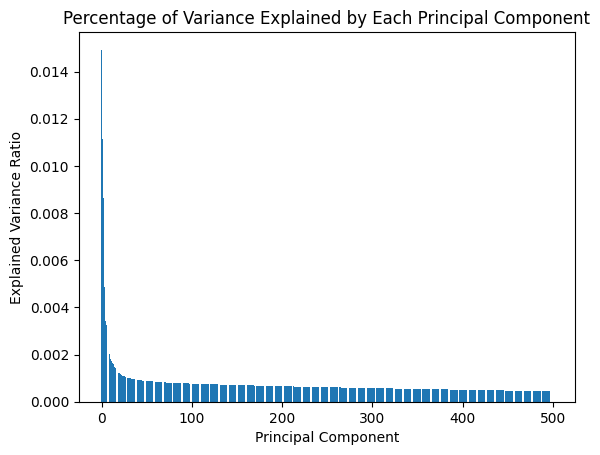

Total explained variance: 0.3753868677234262


In [84]:
print("Explained variance ratio:\n", pca.explained_variance_ratio_)
plt.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Percentage of Variance Explained by Each Principal Component')
plt.show()
print("Total explained variance:", np.sum(pca.explained_variance_ratio_))

# **Splitting into partial train and validation sets**

In [85]:
# Permute observations randomly and extract data and target:
XY = pd.concat([X_transformed, Y], axis=1)
XY = XY.sample(frac=1)
X_permuted = XY.copy().iloc[:, :-2].reset_index(drop=True)
Y_permuted = XY.copy().iloc[:, -2:].reset_index(drop=True)

In [86]:
# Perform splitting:
X_train, X_val, Y_train, Y_val = train_test_split(X_permuted, Y_permuted, train_size=0.9)

# Check the dimensions:
print("X_train dimensions:", X_train.shape)
print("X_val dimensions:", X_val.shape)
print("Y_train dimensions:", Y_train.shape)
print("Y_val dimensions:", Y_val.shape)

X_train dimensions: (3414, 500)
X_val dimensions: (380, 500)
Y_train dimensions: (3414, 2)
Y_val dimensions: (380, 2)


To ensure that cross validation splits performed in two next exercises are identical, we will prepare *CV splitter* to pass to each grid search CV:

In [87]:
kf = KFold(n_splits=5, shuffle=False)

# **Task 2.:** ElasticNet

## **Theoretical introduction**

Let's consider a standard linear regression. Our goal is to minimize residual sum of squares, given by the formula:

$$RSS = ||y - X\beta||^2$$

where $y$ is the target variable (precisely $y = [y_1, \ y_2, \ ..., \ y_n]$ where each $y_i$ is an observation, $i \in \{ 1, ..., n \}$), $X$ is a $m \times n$ matrix of observations and $\beta = [\beta_1, \ \beta_2, \ ..., \ \beta_n]^T$. We achieve this minimization by manipulating values of $\beta_1, \ ..., \ \beta_n$. As a result we obtain a vector $\hat \beta$ that is actually an estimator of a real model, which we can denote as

$$\hat{\beta} = \text{argmin}_\beta \big( ||Y - X\beta||^2 \big)$$

To make a good estimation of this model, we need a lot more observations than model's features. **This is the first big problem with our data** - there are 9001 features and less than 4000 observations in the training data set. Any prediction based on ordinary least squares will fail instantly, because it will be ambiguous. Additionally - small changes in training data will lead to big changes in parameters of $\hat \beta$.

There are some methods to overcome this problem.

1. **Ridge regression**

  Instead of pure $RSS$, we want to minimize $RSS + \lambda_2 ||\beta||^2$. This additional term is a second norm of $\beta$ multiplied by a **tuning parameter** $\lambda_2$. Our estimator looks like this now:

  $$\hat{\beta}_{\text{Ridge}} = \text{argmin}_\beta \big( ||Y - X\beta||^2 + \lambda_2 ||\beta||^2 \big)$$

  This is a big improvement comparing to ordinary least squares, because this method chooses the best model when number of model's features is greater than the number of observations. This large amount of variables can also lead to multicollinearity (independent variables being highly correlated) - ridge regression performs well in this case. It shrinks coefficients of the model closely to 0, but they never achieve 0.


2. **LASSO regression**

  Now, instead of $RSS$ we minimize $RSS + \lambda_1 |\beta|$. The additional term is a first norm of $\beta$ multiplied by an analogous tuning parameter $\lambda_1$. We can write:

  $$\hat \beta_{\text{LASSO}} = \text{argmin}_\beta \big( ||Y - X\beta||^2 + \lambda_1 |\beta| \big)$$

  The difference between this method and ridge regression is the fact, that LASSO can perform both regularization and feature selection. The first norm of $\beta$ can shrink many negligible parameters' coefficients to **exactly** 0. This technique can tell us, which features are important, and which can be ignored.


3. **ElasticNet**

  This method combines two previous approaches. The shrinkage penalty is a linear combination of penalties of Ridge and LASSO methods:

  $$\hat{\beta}_{\text{ElasticNet}} = \text{argmin}_\beta \big( ||Y - X\beta||^2 + \lambda_1 |\beta| + \lambda_2 ||\beta||^2 \big)$$

  This way it can get *the best of both worlds*. We estimate $\beta$ here using $\hat{\beta}_{\text{ElasticNet}}$ estimator, the optimized expression is $||Y - X\beta||^2 + \lambda_1 |\beta| + \lambda_2 ||\beta||^2$ and $\lambda_1$, $\lambda_2$ are this function's hyperparameters. When $\lambda_1 = 0$ we get ridge regression, and when $\lambda_2 = 0$ this method is the same as LASSO.
  
  We will adjust $\lambda_1$, $\lambda_2$ by performing cross-validation on a grid created with different values of these parameters, including edge cases of ridge regression and LASSO.

## **Model training**

In scikit-learn implementation of ElasticNet, instead of $\lambda_1$ and $\lambda_2$ we need to pass $\alpha$ and $\mathcal{l}_1\text{-ratio}$. Dependencies between these variables are as follows:

$$ \alpha = \lambda_1 + \lambda_2$$

$$ \mathcal{l}_1\text{-ratio} = \frac{\lambda_1}{\lambda_1 + \lambda_2} $$

It means that for fixed $\alpha \neq 0$:

- when $\mathcal{l}_1\text{-ratio} \in (0, 1)$, we get ElasticNet with hyperparameters given with equations:

$$ \lambda_1 = \alpha \cdot \mathcal{l}_1\text{-ratio} $$

$$ \lambda_2 = \alpha \cdot (1 - \mathcal{l}_1\text{-ratio}) $$

- when $\mathcal{l}_1\text{-ratio} = 0$, we get ridge regression with $\lambda_2 = \alpha$,
- when $\mathcal{l}_1\text{-ratio} = 1$, we get LASSO with $\lambda_1 = \alpha$.


If $\alpha = 0$ we get ordinary least squares, but it's not interesting for us in this task.

We will test $\alpha \in \{ 0.2 \} \cup \{ 0.5, 1.0, 1.5, ... , 4.5 \}$ and $\mathcal{l}_1\text{-ratio} \in \{ 0.1, 0.2, ..., 1.0 \}$

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.222e+02, tolerance: 2.012e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


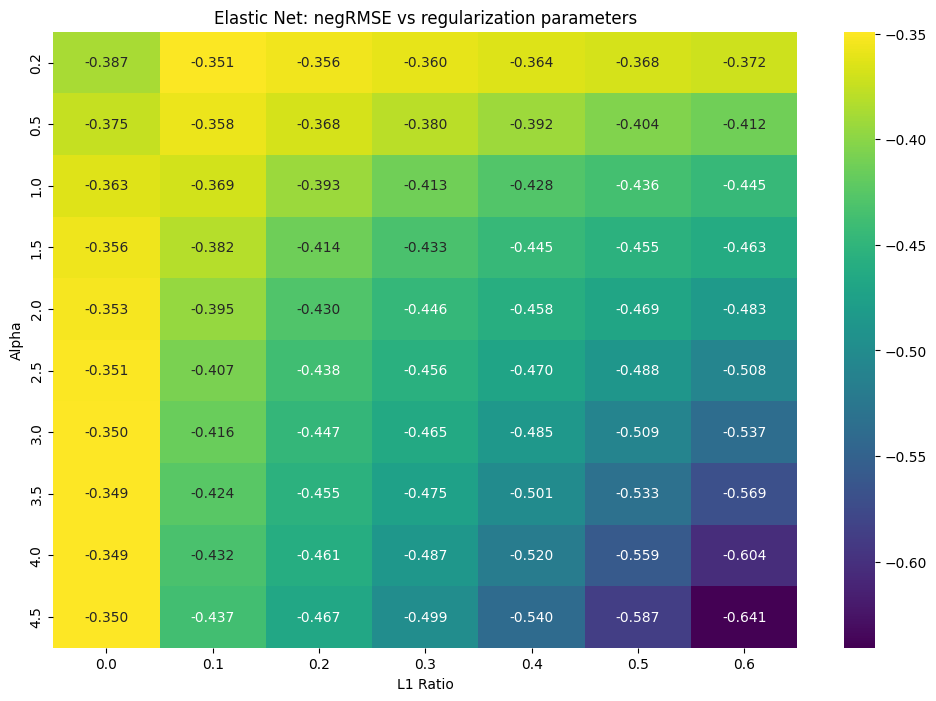

Optimal RMSE for Elastic Net: 0.3491
Optimal parameters: alpha = 3.5, l1_ratio = 0.0
Calculated optimal lambda_1 = 0.0000, lambda_2 = 3.5000


In [88]:
en_param_grid = {
    'alpha': [0.2, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5],
    'l1_ratio': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
}

# ElasticNet:
en = ElasticNet()
en_grid_search = GridSearchCV(estimator=en,
                              param_grid=en_param_grid,
                              cv=kf, # pre-defined k-fold CV
                              scoring='neg_root_mean_squared_error',
                              n_jobs=-1,
                              return_train_score=True)

# Disclaimer: GridSearchCV implements fit() and predict() methods, so we
# can fit our training data and then compare predictions on X_val with Y_val.

en_grid_search.fit(X_train, Y_train['Expected'])

en_results = pd.DataFrame(en_grid_search.cv_results_)
pivot_table = en_results.pivot_table(values='mean_test_score', index='param_alpha', columns='param_l1_ratio')

# Heatmap:
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='viridis', annot=True, fmt='.3f')
plt.title('Elastic Net: negRMSE vs regularization parameters')
plt.xlabel('L1 Ratio')
plt.ylabel('Alpha')
plt.show()

# Optimal RMSE for Elastic Net
en_best_rmse = -en_grid_search.best_score_
en_best_params = en_grid_search.best_params_
optimal_alpha = en_best_params["alpha"]
optimal_l1_ratio = en_best_params["l1_ratio"]

# Optimal values of hyperparameters:
optimal_lambda_1 = optimal_alpha * optimal_l1_ratio
optimal_lambda_2 = optimal_alpha * (1 - optimal_l1_ratio)

print(f'Optimal RMSE for Elastic Net: {en_best_rmse:.4f}')
print(f'Optimal parameters: alpha = {optimal_alpha}, l1_ratio = {optimal_l1_ratio}')
print(f'Calculated optimal lambda_1 = {optimal_lambda_1:.4f}, lambda_2 = {optimal_lambda_2:.4f}')

In [90]:
# Prediction on validation set:
Y_val_dropped_index = Y_val.copy()['Expected'].reset_index(drop=True)
Y_val_pred_en = en_grid_search.predict(X_val)
rmse_pred_en = np.sqrt(mean_squared_error(Y_val_dropped_index, Y_val_pred_en))
print("RMSE of prediction:", rmse_pred_en)
Y_val_dropped_index = pd.DataFrame(Y_val_dropped_index)
Y_val_pred_en = pd.DataFrame(Y_val_pred_en)

RMSE of prediction: 0.3447096203712141


In [91]:
Y_en_concat = pd.concat([Y_val_dropped_index, Y_val_pred_en], axis=1)
Y_en_concat = Y_en_concat.rename(columns={Y_en_concat.columns[1]: "Predicted"})
Y_en_concat

,Expected,Predicted
0,1.964348,1.841866
1,0.000000,0.117290
2,0.000000,0.147201
3,1.540102,1.690684
4,1.810579,1.573407
...,...,...
375,1.808773,1.766627
376,0.000000,-0.087466
377,0.356197,0.110652
378,1.324204,1.278486


## **Results**

Optimal values of tuning parameters:

$$ \lambda_1 = 0 $$
$$ \lambda_2 = 3.5 $$

These results are non-trivial (for example it didn't turn out that $\lambda_1 = 0, \lambda_2 = 0$ are the best parameters), but they are an edge-case: ElasticNet became ridge regression. The optimal $\lambda_1$ is equal to 0, which means that the LASSO method generally makes things worse. The optimal $\lambda_2$ is equal to 3.5, which means that ridge regression can make the results a bit better than ordinary least squares method. Considering the properties of both methods, it makes a lot of sense looking at the data. There is a lot of correlated pairs of variables and we know that ridge regression gives better results in this case. Additionally, PCA has revealed that each principal component (and also many variables before dimensionality-reduction) explains much less than 1% of the variance, but each component explains some non-negligible amount of variance. Eventually, it results in a huge number of variables that are important for the model, which means LASSO won't work well here, because it eliminates negligible features.

It means that the best-fitting model (vector $\beta$ of parameters) minimizes an expression $||Y - X\beta||^2 + 3.5 ||\beta||^2$.

We can get to know more about this particular model from this table:

In [93]:
en_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,6.758514,1.781427,0.014174,0.004072,0.2,0.0,"{'alpha': 0.2, 'l1_ratio': 0.0}",-0.403786,-0.368465,-0.380698,...,-0.387410,0.016518,21,-0.296602,-0.307233,-0.304909,-0.304763,-0.305809,-0.303863,0.003736
1,0.086569,0.012139,0.012380,0.000242,0.2,0.1,"{'alpha': 0.2, 'l1_ratio': 0.1}",-0.364421,-0.344343,-0.350458,...,-0.350752,0.011088,6,-0.322561,-0.332207,-0.330618,-0.330842,-0.332113,-0.329668,0.003611
2,0.080357,0.009226,0.012301,0.000268,0.2,0.2,"{'alpha': 0.2, 'l1_ratio': 0.2}",-0.365207,-0.352366,-0.353383,...,-0.355671,0.011556,8,-0.338687,-0.345794,-0.344760,-0.344056,-0.346319,-0.343923,0.002734
3,0.072650,0.007962,0.011866,0.000322,0.2,0.3,"{'alpha': 0.2, 'l1_ratio': 0.3}",-0.369525,-0.360658,-0.356605,...,-0.360398,0.012180,11,-0.346351,-0.352371,-0.350722,-0.350622,-0.352920,-0.350597,0.002306
4,0.071909,0.007787,0.012411,0.000521,0.2,0.4,"{'alpha': 0.2, 'l1_ratio': 0.4}",-0.373988,-0.364933,-0.361023,...,-0.364136,0.011930,13,-0.353060,-0.357544,-0.356730,-0.356585,-0.359929,-0.356770,0.002208


In [94]:
# Our model's performance:
en_model_results = en_results.query(f"param_alpha == {optimal_alpha} and param_l1_ratio == {optimal_l1_ratio}")
en_model_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
49,6.627169,1.313933,0.016438,0.007723,3.5,0.0,"{'alpha': 3.5, 'l1_ratio': 0.0}",-0.365924,-0.341464,-0.346265,...,-0.349083,0.010079,1,-0.309459,-0.318713,-0.317187,-0.317041,-0.318292,-0.316138,0.0034


Finally, let's write down **mean training error and mean test error**:

In [95]:
print("Mean training error:", -en_model_results['mean_train_score'].values[0])
print("Mean test error:", -en_model_results['mean_test_score'].values[0])

Mean training error: 0.3161383629402617
Mean test error: 0.3490827986396249


# **Task 3.:** Random forests

## **Model training**

From many hyperparameters, I've decided to optimize a combination of these three:

- **n_estimators**: number of trees in the forest. Increasing this number generally can improve the performance and reduce variance, but it's also computationally complex. This is why these in the parameters' grid are not so large.

- **max_depth**: maximum depth of each decision tree in the forest. Deeper trees can capture more complex patterns, but it can also lead to overfitting. Considering this (and the computational complexity) these depths are small.

- **min_samples_split**: minimum number of samples required to split a node in a tree. We don't want to achieve very high granularity (to prevent overfitting) so values of this parameter are around 10-20.

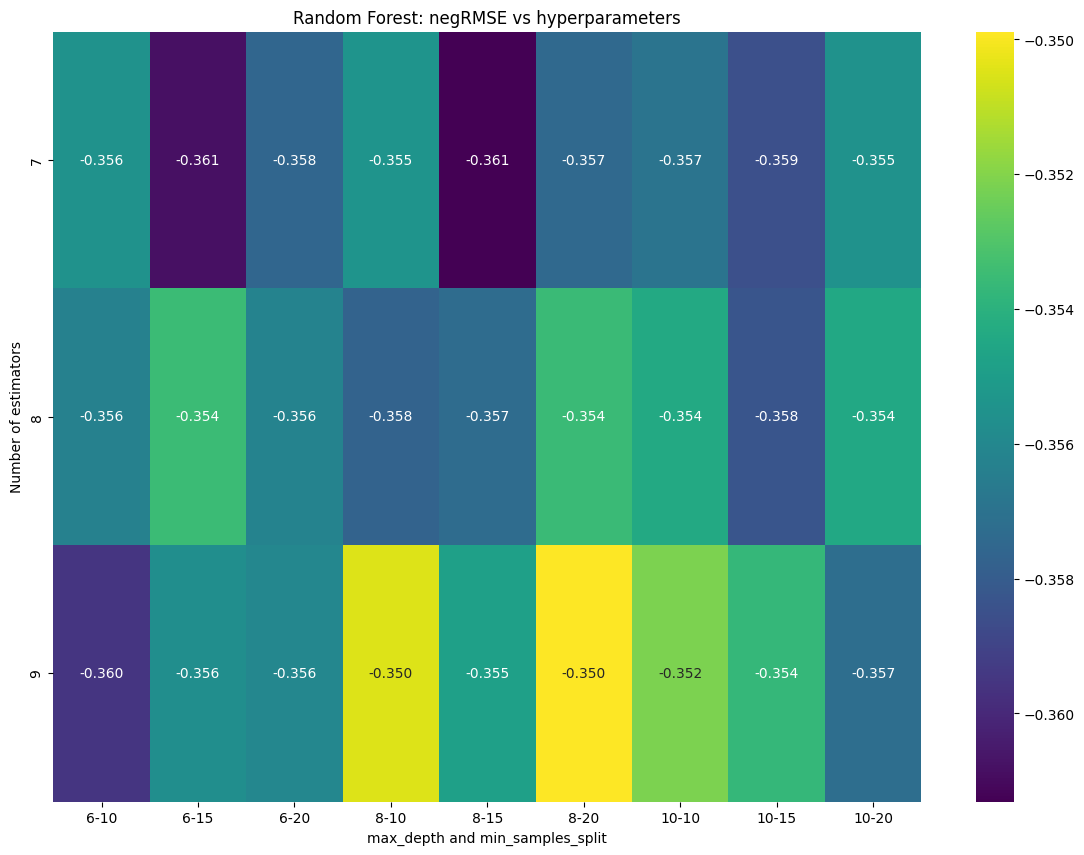

Optimal RMSE for Random Forest: 0.3499
Optimal n_estimators: 9
Optimal max_depth: 8
Optimal min_samples_split: 20


In [96]:
rf_param_grid = {
    'n_estimators': [7, 8, 9],
    'max_depth': [6, 8, 10],
    'min_samples_split': [10, 15, 20]
}

# Random forest:
rf = RandomForestRegressor()
rf_grid_search = GridSearchCV(estimator=rf,
                              param_grid=rf_param_grid,
                              cv=kf,
                              scoring='neg_root_mean_squared_error',
                              n_jobs=-1,
                              return_train_score=True)

rf_grid_search.fit(X_train, Y_train['Expected'])

rf_results = pd.DataFrame(rf_grid_search.cv_results_)
pivot_table = rf_results.pivot_table(values='mean_test_score', index='param_n_estimators', columns=['param_max_depth', 'param_min_samples_split'])

# Heatmap:
plt.figure(figsize=(14, 10))
sns.heatmap(pivot_table, cmap='viridis', annot=True, fmt='.3f')
plt.title('Random Forest: negRMSE vs hyperparameters')
plt.xlabel('max_depth and min_samples_split')
plt.ylabel('Number of estimators')
plt.show()

# Optimal RMSE for random forest:
rf_best_rmse = -rf_grid_search.best_score_
rf_best_params = rf_grid_search.best_params_

# Optimal values of hyperparameters:
optimal_n_estimators = rf_best_params['n_estimators']
optimal_max_depth = rf_best_params['max_depth']
optimal_min_samples_split = rf_best_params['min_samples_split']

print(f'Optimal RMSE for Random Forest: {rf_best_rmse:.4f}')
print(f"Optimal n_estimators: {optimal_n_estimators}")
print(f"Optimal max_depth: {optimal_max_depth}")
print(f"Optimal min_samples_split: {optimal_min_samples_split}")

In [98]:
# Prediction on validation set:
Y_val_dropped_index = Y_val.copy()['Expected'].reset_index(drop=True)
Y_val_pred_rf = rf_grid_search.predict(X_val)
rmse_pred_rf = np.sqrt(mean_squared_error(Y_val_dropped_index, Y_val_pred_rf))
print("RMSE of prediction:", rmse_pred_rf)
Y_val_dropped_index = pd.DataFrame(Y_val_dropped_index)
Y_val_pred_rf = pd.DataFrame(Y_val_pred_rf)

RMSE of prediction: 0.35077505169316675


In [99]:
Y_en_concat = pd.concat([Y_val_dropped_index, Y_val_pred_rf], axis=1)
Y_en_concat = Y_en_concat.rename(columns={Y_en_concat.columns[1]: "Predicted"})
Y_en_concat

,Expected,Predicted
0,1.964348,1.707374
1,0.000000,0.306925
2,0.000000,0.137581
3,1.540102,1.590922
4,1.810579,1.709422
...,...,...
375,1.808773,1.715756
376,0.000000,0.114791
377,0.356197,0.085199
378,1.324204,1.534108


## **Results**

Optimal values of tuning parameters:

$$\text{n_estimators}=9$$

$$\text{max_depth}=8$$

$$\text{min_samples_split}=20$$

We will also inspect the table below to learn more about optimal model's performance.

In [100]:
rf_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,7.317707,1.246198,0.013491,0.002405,6,10,7,"{'max_depth': 6, 'min_samples_split': 10, 'n_e...",-0.358776,-0.356021,...,-0.355550,0.003690,12,-0.288997,-0.297522,-0.295785,-0.294263,-0.290683,-0.293450,0.003168
1,8.803717,1.687567,0.015821,0.007804,6,10,8,"{'max_depth': 6, 'min_samples_split': 10, 'n_e...",-0.370129,-0.341521,...,-0.356356,0.009084,16,-0.283537,-0.301257,-0.294428,-0.295038,-0.290924,-0.293037,0.005800
2,10.384928,2.280516,0.017842,0.006602,6,10,9,"{'max_depth': 6, 'min_samples_split': 10, 'n_e...",-0.373611,-0.344238,...,-0.359542,0.010672,25,-0.282941,-0.296971,-0.295659,-0.296340,-0.291271,-0.292637,0.005244
3,7.397682,1.331520,0.014396,0.004830,6,15,7,"{'max_depth': 6, 'min_samples_split': 15, 'n_e...",-0.369799,-0.342454,...,-0.360856,0.010998,26,-0.286808,-0.298543,-0.297047,-0.297862,-0.295874,-0.295227,0.004302
4,9.177546,1.709300,0.012415,0.000757,6,15,8,"{'max_depth': 6, 'min_samples_split': 15, 'n_e...",-0.368066,-0.338212,...,-0.353509,0.009813,4,-0.284752,-0.301307,-0.299159,-0.297222,-0.295824,-0.295653,0.005755


In [101]:
# Our model's performance:
rf_model_results = rf_results.query(f"param_n_estimators == {optimal_n_estimators} and \
                                      param_max_depth == {optimal_max_depth} and \
                                      param_min_samples_split == {optimal_min_samples_split}")
rf_model_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
17,11.809833,1.198002,0.018873,0.007816,8,20,9,"{'max_depth': 8, 'min_samples_split': 20, 'n_e...",-0.364273,-0.33833,...,-0.349886,0.008919,1,-0.26481,-0.281831,-0.279213,-0.27711,-0.274113,-0.275415,0.005876


Let's write down **mean training error and mean test error**:

In [102]:
print("Mean training error:", -rf_model_results['mean_train_score'].values[0])
print("Mean test error:", -rf_model_results['mean_test_score'].values[0])

Mean training error: 0.27541534622091024
Mean test error: 0.34988554982471254


# **Comparing ElasticNet, random forest and a reference model**

After performing identical cross-validation on both models, we can compare their performance on the training data. We will also compare their performance to a reference model, that always predicts a value that is the mean of the target variable.

In [103]:
# Reference model: always predicts the mean of Y.

target_mean = np.mean(Y_values)

class ConstantMeanEstimator(BaseEstimator):
    def __init__(self, dummy_param=None):
        self.dummy_param = dummy_param

    def fit(self, X, y=None):
        return self

    def predict(self, X):
        return np.full(len(X), target_mean)

In [104]:
dummy_param_grid = {'dummy_param': [None]}
constant_mean_estimator = ConstantMeanEstimator()

dummy_grid_search = GridSearchCV(estimator=constant_mean_estimator,
                                 param_grid=dummy_param_grid,
                                 cv=kf,
                                 scoring='neg_root_mean_squared_error',
                                 n_jobs=-1,
                                 return_train_score=True)

dummy_grid_search.fit(X_train, Y_train['Expected'])
dummy_model_results = pd.DataFrame(dummy_grid_search.cv_results_)
dummy_model_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_dummy_param,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.027918,0.021158,0.002027,0.001505,None,{'dummy_param': None},-0.764145,-0.768707,-0.778456,-0.759804,...,-0.767609,0.006201,1,-0.768504,-0.767366,-0.764904,-0.76958,-0.767809,-0.767633,0.001556


We can get rid of columns that are specific for each model (columns with parameters' info) and compare their performance for each fold:

In [105]:
en_model_results_comp = en_model_results.drop(columns=['param_alpha', 'param_l1_ratio', 'params'])
rf_model_results_comp = rf_model_results.drop(columns=['param_n_estimators', 'param_max_depth', 'param_min_samples_split', 'params'])
dm_model_results_comp = dummy_model_results.drop(columns=['param_dummy_param', 'params'])

comparison = pd.concat([en_model_results_comp, rf_model_results_comp, dm_model_results_comp], axis=0).T
comparison = comparison.rename(columns={comparison.columns[0]: "ElasticNet",
                                        comparison.columns[1]: "Random Forest",
                                        comparison.columns[2]: "Ref. model"})
comparison

,ElasticNet,Random Forest,Ref. model
mean_fit_time,6.627169,11.809833,0.027918
std_fit_time,1.313933,1.198002,0.021158
mean_score_time,0.016438,0.018873,0.002027
std_score_time,0.007723,0.007816,0.001505
split0_test_score,-0.365924,-0.364273,-0.764145
split1_test_score,-0.341464,-0.338330,-0.768707
split2_test_score,-0.346265,-0.354365,-0.778456
split3_test_score,-0.354180,-0.343946,-0.759804
split4_test_score,-0.337581,-0.348515,-0.766932
mean_test_score,-0.349083,-0.349886,-0.767609


This comparison gives us a pretty interesting insight in our models. We can see, that:

- They do what they are supposed to do, because their predictions are better than a reference/benchmark model.
- For each fold/split, ElasticNet is fitted 2 times faster than random forest:

In [106]:
comparison.loc['mean_fit_time']

ElasticNet        6.627169
Random Forest    11.809833
Ref. model        0.027918
Name: mean_fit_time, dtype: float64

- Although the absolute value of mean train score is smaller for random forest, when it comes to mean test score it performs a bit worse than ElasticNet:

In [107]:
comparison.loc['mean_train_score']

ElasticNet      -0.316138
Random Forest   -0.275415
Ref. model      -0.767633
Name: mean_train_score, dtype: float64

In [108]:
comparison.loc['mean_test_score']

ElasticNet      -0.349083
Random Forest   -0.349886
Ref. model      -0.767609
Name: mean_test_score, dtype: float64

**Considering these observations, I would choose ElasticNet regression for this problem.** The differences are not huge, but when we properly choose parameters of ElasticNet, we can get quite an improvement comparing to random forest. ElasticNet is also improved version of linear regression, so it's easier to explain when we come back to original variables.

# **Task 4.:** Model training, prediction on the test set

## **Description**

This task was a bit problematic.

- First, I trained XGBoost for some combinations of parameters. To save time, I didn't perform cross-validation on each of them, but chose the best one based on predictions on validation set and then performed cross-validation. The results were worse than in case of ElasticNet with best parameters (although they weren't much worse, I decided that ElasticNet has more stable RMSE and will be generally better).
- I also checked XGBRegressor from scikit-learn, but it took too long to train anything useful, and for small parameters results were **far** worse than best ElasticNet model.
- Then I asked ChatGPT to write a basic neural network - its performance was good, but still not as good as ElasticNet's.
- Finally, I decided to use ElasticNet after dimensionality reduction to 3500 (instead of 500) principal components of PCA. Steps at the end of this section are similar to these in task 2.

## **XGBoost**

In [109]:
# Perform splitting:
X_full_train, X_full_val, Y_full_train, Y_full_val = train_test_split(X, Y, train_size=0.95)

X_full_train.reset_index(drop=True, inplace=True)
X_full_val.reset_index(drop=True, inplace=True)
Y_full_train.reset_index(drop=True, inplace=True)
Y_full_val.reset_index(drop=True, inplace=True)

# Check the dimensions:
print("X_full_train dimensions:", X_full_train.shape)
print("X_full_val dimensions:", X_full_val.shape)
print("Y_full_train dimensions:", Y_full_train.shape)
print("Y_full_val dimensions:", Y_full_val.shape)

X_full_train dimensions: (3604, 9001)
X_full_val dimensions: (190, 9001)
Y_full_train dimensions: (3604, 2)
Y_full_val dimensions: (190, 2)


In [35]:
print("RMSE for params:\n")

eta_set = [0.6, 0.7, 0.8, 0.9]
dtrain = xgb.DMatrix(data=X_full_train, label=Y_full_train['Expected'])

for max_depth in range(2, 8):
  for eta in eta_set:
    for num_round in range (2, 5):
      param = {
          'max_depth': max_depth,
          'eta': eta,
          'objective': 'reg:squarederror',
          'tree_method': 'exact'
      }
      bst = xgb.train(param, dtrain, num_round)
      dtest = xgb.DMatrix(data=X_full_val)
      preds = bst.predict(dtest)
      mse = mean_squared_error(preds, Y_full_val['Expected'])
      rmse = np.sqrt(mse)

      print(f"max_depth: {max_depth}, eta: {eta}, num_round: {num_round}:\t {rmse}")

RMSE for params:

max_depth: 2, eta: 0.6, num_round: 2:	 0.38831584694326815
max_depth: 2, eta: 0.6, num_round: 3:	 0.3480210231218757
max_depth: 2, eta: 0.6, num_round: 4:	 0.3324876024966246
max_depth: 2, eta: 0.7, num_round: 2:	 0.360348552164358
max_depth: 2, eta: 0.7, num_round: 3:	 0.32677052986289606
max_depth: 2, eta: 0.7, num_round: 4:	 0.3190459225015747
max_depth: 2, eta: 0.8, num_round: 2:	 0.3391459671348882
max_depth: 2, eta: 0.8, num_round: 3:	 0.31384917024644243
max_depth: 2, eta: 0.8, num_round: 4:	 0.3141615257764278
max_depth: 2, eta: 0.9, num_round: 2:	 0.34173606747324
max_depth: 2, eta: 0.9, num_round: 3:	 0.31935175625042134
max_depth: 2, eta: 0.9, num_round: 4:	 0.31773288255425236
max_depth: 3, eta: 0.6, num_round: 2:	 0.3461840237467324
max_depth: 3, eta: 0.6, num_round: 3:	 0.31950984628171564
max_depth: 3, eta: 0.6, num_round: 4:	 0.3140540971953951
max_depth: 3, eta: 0.7, num_round: 2:	 0.3241656071914171
max_depth: 3, eta: 0.7, num_round: 3:	 0.3108291388

In [37]:
pred_df = pd.DataFrame(preds)
comp = pd.concat([Y_full_val['Expected'], pred_df], axis=1)
comp

,Expected,0
0,0.000000,0.114085
1,2.201385,1.920660
2,1.702439,1.832606
3,0.289152,0.114085
4,2.024216,1.743448
...,...,...
185,0.000000,0.114085
186,2.010888,1.832606
187,1.825900,1.533260
188,0.900100,1.739283


In [113]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

rmse_scores = []

for train_index, val_index in kf.split(X_full_train):

    dtrain = xgb.DMatrix(data=X_full_train.iloc[train_index],
                         label=Y_full_train['Expected'].iloc[train_index])

    param = {
    'max_depth': 3,
    'eta': 0.7,
    'objective': 'reg:squarederror',
    'tree_method': 'exact'
    }
    num_round = 4

    bst = xgb.train(param, dtrain, num_round)

    dtest = xgb.DMatrix(data=X_full_train.iloc[val_index])
    preds = bst.predict(dtest)

    mse = mean_squared_error(preds, Y_full_train['Expected'].iloc[val_index])
    rmse = np.sqrt(mse)
    rmse_scores.append(rmse)

In [114]:
# Print the RMSE for each fold
for i, rmse in enumerate(rmse_scores, start=1):
    print(f"Fold {i}: RMSE = {rmse}")

Fold 1: RMSE = 0.3455574333793222
Fold 2: RMSE = 0.3612496999228778
Fold 3: RMSE = 0.35049410667809394
Fold 4: RMSE = 0.3791715363114685
Fold 5: RMSE = 0.3513635422335212


## **Neural network**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming X_train, Y_train, X_val, and Y_val are your dataframes
# Convert DataFrames to numpy arrays
X_train_np = X_train.values
Y_train_np = Y_train['Expected'].values
X_val_np = X_val.values
Y_val_np = Y_val['Expected'].values

# Convert numpy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train_np, dtype=torch.float32)
Y_train_tensor = torch.tensor(Y_train_np, dtype=torch.float32).view(-1, 1)
X_val_tensor = torch.tensor(X_val_np, dtype=torch.float32)
Y_val_tensor = torch.tensor(Y_val_np, dtype=torch.float32).view(-1, 1)

# Create DataLoader for batching
train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Define the neural network
class SimpleNN(nn.Module):
    def __init__(self, input_dim):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the model, loss function, and optimizer
input_dim = X_train_np.shape[1]
model = SimpleNN(input_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    for X_batch, Y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, Y_batch)
        loss.backward()
        optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model on validation data
model.eval()
with torch.no_grad():
    preds = model(X_val_tensor).numpy()

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(Y_val_np, preds))
print("Root Mean Squared Error (RMSE):", rmse)

Epoch [10/50], Loss: 0.0361
Epoch [20/50], Loss: 0.0275
Epoch [30/50], Loss: 0.0075
Epoch [40/50], Loss: 0.0058
Epoch [50/50], Loss: 0.0037
Root Mean Squared Error (RMSE): 0.3998338010706906


## **ElasticNet, but better**

In [115]:
# Initialize PCA and fit to the training data:
pca = PCA(n_components=3500)
pca.fit(X_scaled)

# Transform the data:
X_pca = np.ascontiguousarray(pca.transform(X_scaled))
X_test_pca = np.ascontiguousarray(pca.transform(X_test_scaled))

In [116]:
X_transformed = pd.DataFrame(X_pca)
X_test_transformed = pd.DataFrame(X_test_pca)
X_transformed

,0,1,2,3,4,5,6,7,8,9,...,3490,3491,3492,3493,3494,3495,3496,3497,3498,3499
0,-9.735531,1.402457,-3.440535,0.357384,-2.674488,-1.516132,2.443353,2.665707,-1.844955,-0.815056,...,0.512830,-0.929157,0.387446,-0.131914,2.282565,0.535799,-0.265339,-0.621610,-0.465647,-1.649232
1,6.549142,-7.276501,12.050870,-9.130486,3.409364,-10.385560,-4.375843,3.014561,-2.490366,2.083263,...,-0.249791,0.412100,0.599505,-0.445533,0.062213,-0.091313,0.177611,0.262044,0.769425,0.655671
2,-11.498628,1.152521,-5.155842,-0.713581,1.259086,1.569914,0.946597,-0.455894,-0.223087,-1.019973,...,1.215671,0.037275,-0.010086,0.033073,0.876536,0.311327,-0.135316,-1.805901,1.537558,0.748611
3,-3.004241,-1.266662,-5.976328,3.612160,-5.689065,-2.553221,2.721781,1.779775,-7.631560,0.805856,...,0.076583,0.377262,0.035246,-0.685254,0.511643,-0.033242,-1.294335,-1.839891,0.464372,-0.555493
4,11.629120,-7.419765,-3.941991,21.085877,10.131696,-10.636384,5.502514,-5.992784,-1.390797,-1.532092,...,-0.004907,0.183803,0.211141,-0.388062,0.474106,-0.182780,0.439928,-0.978940,-0.291426,0.776308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3789,9.524686,-7.068284,2.680133,12.585699,1.026538,4.514036,4.762877,21.118893,16.105194,-5.430251,...,-0.032546,-0.312018,-0.153487,0.080926,0.107400,-0.111395,0.602396,-0.184181,0.127275,0.075835
3790,8.394819,-10.879807,11.265277,-9.569837,5.119827,-6.773748,-2.766659,1.465136,-2.354090,3.873543,...,0.007205,0.159589,0.184120,-0.408008,-0.413631,-0.071225,0.380794,0.159534,-0.183537,0.017503
3791,12.927367,-11.384388,9.765474,-5.731725,-2.239463,7.385182,6.665659,-8.063044,5.591307,-2.628183,...,0.346520,-0.338270,-0.063943,-0.048795,-0.511913,-0.164487,-0.037321,0.274020,0.019124,-0.034250
3792,0.870388,2.336367,-4.875975,-1.191866,-1.694787,-2.249942,-6.275331,-1.956447,7.703920,0.105907,...,0.261085,0.780588,-0.740828,0.496401,-0.274986,-0.237636,0.185312,0.420711,0.205527,0.867778


Explained variance ratio:
 [1.49248973e-02 1.11418984e-02 8.62077127e-03 ... 4.20813453e-05
 4.19663087e-05 4.19272635e-05]


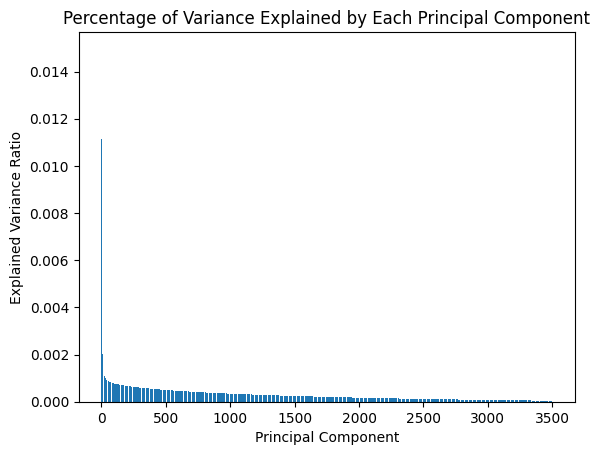

Total explained variance: 0.9905218109731094


In [117]:
print("Explained variance ratio:\n", pca.explained_variance_ratio_)
plt.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Percentage of Variance Explained by Each Principal Component')
plt.show()
print("Total explained variance:", np.sum(pca.explained_variance_ratio_))

In [119]:
# Permute observations randomly and extract data and target:
XY = pd.concat([X_transformed, Y], axis=1)
XY = XY.sample(frac=1)
X_permuted = XY.copy().iloc[:, :-2].reset_index(drop=True)
Y_permuted = XY.copy().iloc[:, -2:].reset_index(drop=True)

# Perform splitting:
X_train, X_val, Y_train, Y_val = train_test_split(X_permuted, Y_permuted, train_size=0.95)

# Check the dimensions:
print("X_train dimensions:", X_train.shape)
print("X_val dimensions:", X_val.shape)
print("Y_train dimensions:", Y_train.shape)
print("Y_val dimensions:", Y_val.shape)

X_train dimensions: (3604, 3500)
X_val dimensions: (190, 3500)
Y_train dimensions: (3604, 2)
Y_val dimensions: (190, 2)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.701e+02, tolerance: 2.137e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


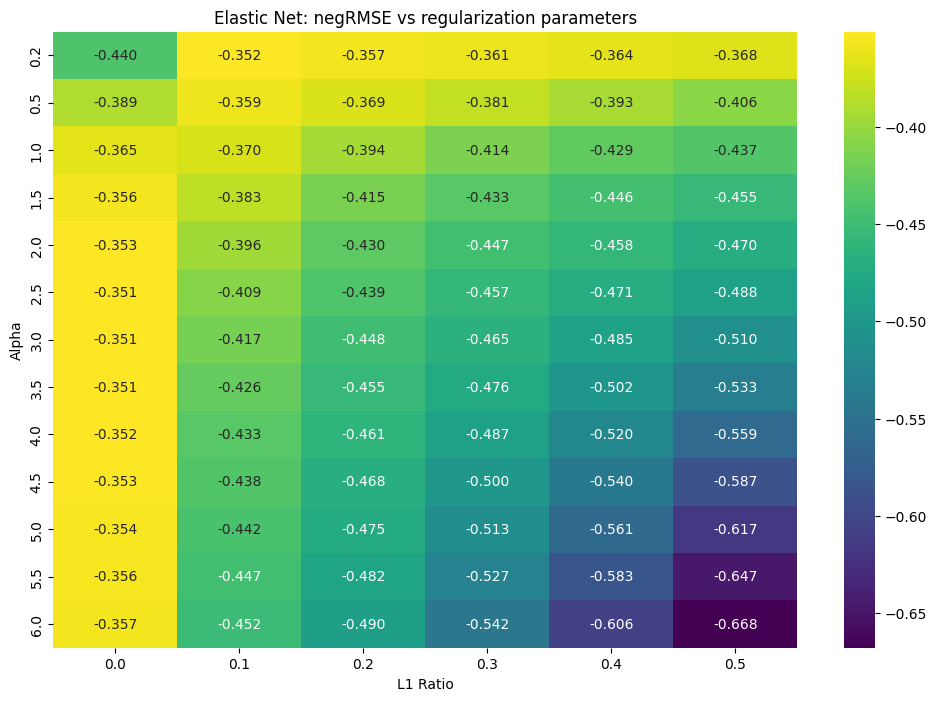

Optimal RMSE for Elastic Net: 0.3511
Optimal parameters: alpha = 3.0, l1_ratio = 0.0
Calculated optimal lambda_1 = 0.0000, lambda_2 = 3.0000


In [120]:
en_param_grid = {
    'alpha': [0.2, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0],
    'l1_ratio': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
}

# ElasticNet:
en = ElasticNet()
en_grid_search = GridSearchCV(estimator=en,
                              param_grid=en_param_grid,
                              cv=5,
                              scoring='neg_root_mean_squared_error',
                              n_jobs=-1,
                              return_train_score=True)

# Disclaimer: GridSearchCV implements fit() and predict() methods, so we
# can fit our training data and then compare predictions on X_val with Y_val.

en_grid_search.fit(X_train, Y_train['Expected'])

en_results = pd.DataFrame(en_grid_search.cv_results_)
pivot_table = en_results.pivot_table(values='mean_test_score', index='param_alpha', columns='param_l1_ratio')

# Heatmap:
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='viridis', annot=True, fmt='.3f')
plt.title('Elastic Net: negRMSE vs regularization parameters')
plt.xlabel('L1 Ratio')
plt.ylabel('Alpha')
plt.show()

# Optimal RMSE for Elastic Net
en_best_rmse = -en_grid_search.best_score_
en_best_params = en_grid_search.best_params_
optimal_alpha = en_best_params["alpha"]
optimal_l1_ratio = en_best_params["l1_ratio"]

# Optimal values of hyperparameters:
optimal_lambda_1 = optimal_alpha * optimal_l1_ratio
optimal_lambda_2 = optimal_alpha * (1 - optimal_l1_ratio)

print(f'Optimal RMSE for Elastic Net: {en_best_rmse:.4f}')
print(f'Optimal parameters: alpha = {optimal_alpha}, l1_ratio = {optimal_l1_ratio}')
print(f'Calculated optimal lambda_1 = {optimal_lambda_1:.4f}, lambda_2 = {optimal_lambda_2:.4f}')

In [122]:
# Our model's performance:
en_model_results = en_results.query(f"param_alpha == {optimal_alpha} and param_l1_ratio == {optimal_l1_ratio}")
en_model_results.T

,36
mean_fit_time,53.383712
std_fit_time,1.625774
mean_score_time,0.099905
std_score_time,0.020112
param_alpha,3.0
param_l1_ratio,0.0
params,"{'alpha': 3.0, 'l1_ratio': 0.0}"
split0_test_score,-0.365846
split1_test_score,-0.354263
split2_test_score,-0.34046


Prediction on X_val:

In [123]:
X_val

,0,1,2,3,4,5,6,7,8,9,...,3490,3491,3492,3493,3494,3495,3496,3497,3498,3499
3214,-14.540665,3.699857,-1.492534,-1.986936,3.221918,0.797956,-2.096082,1.010500,2.858768,-1.978680,...,-1.351247,-0.436296,0.162968,-0.013416,0.235269,-0.995690,-0.566207,1.193343,-0.502263,-0.605899
2182,-10.203103,1.872629,-1.368550,-1.347052,0.938191,0.662573,-0.091442,1.490899,-0.903933,0.068939,...,-0.300369,-0.065760,-1.497901,1.494699,0.099540,0.315761,0.538257,0.867566,0.361099,-0.191732
3035,-9.518980,0.552643,-4.902488,-0.756297,-3.184470,-1.433441,2.186777,-0.612378,-3.225299,-0.319053,...,-0.838803,-0.383788,0.143527,1.102688,1.153021,1.630359,-0.622799,1.242143,-0.802694,-0.807068
2171,7.991558,-7.903349,13.976966,-8.742356,6.375442,-7.061347,-3.096566,2.668582,-0.181976,1.043751,...,0.379738,0.307387,0.555931,0.641564,0.165315,-0.071177,0.201745,0.153976,0.244070,0.456452
3466,-5.967986,-0.269779,-4.138187,0.262208,-3.882735,-2.474873,2.111858,2.101860,-5.785030,-0.206163,...,-1.509102,0.145479,1.099390,-0.531322,-0.845657,0.139068,-0.668069,0.698743,-0.139314,0.184916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2576,9.859270,-7.848276,-4.237142,22.925523,16.467872,-11.596727,6.977032,-7.151568,0.356547,-0.463778,...,-0.242659,0.299853,0.476307,0.570878,-0.499616,-0.956778,-0.158815,-0.779406,-0.006668,0.198274
169,9.592790,-0.240995,-10.448440,0.132460,-0.137021,-0.728146,-5.889323,-7.126067,9.774740,6.021383,...,0.806029,-1.515211,-0.112183,0.257047,-0.340412,-0.121810,0.551950,0.361328,-0.752221,0.360456
1339,10.693260,-9.063464,-4.863387,24.932868,13.897205,-13.407240,8.117628,-9.622155,0.091951,-2.527697,...,0.192774,-0.423527,-0.147321,0.204548,-0.117194,-0.191507,0.385203,-0.544583,0.286803,0.045874
699,4.343526,-0.880817,-11.379865,3.312412,-3.326873,-5.137922,-1.192611,-1.237391,0.174744,4.314582,...,0.576259,0.830295,0.605783,-0.157114,0.533318,-1.236946,0.004160,0.235952,-0.649902,-1.255796


In [124]:
Y_val

,Id,Expected
3214,1582,1.309115
2182,1000,1.577570
3035,1452,1.623078
2171,1603,0.396695
3466,2383,1.742175
...,...,...
2576,395,1.459129
169,1723,0.285755
1339,3179,1.939445
699,710,1.689937


In [125]:
# Prediction on validation set:
X_val_dropped_index = X_val.copy().reset_index(drop=True)
Y_val_dropped_index = Y_val.copy()['Expected'].reset_index(drop=True)

In [126]:
X_val_dropped_index

,0,1,2,3,4,5,6,7,8,9,...,3490,3491,3492,3493,3494,3495,3496,3497,3498,3499
0,-14.540665,3.699857,-1.492534,-1.986936,3.221918,0.797956,-2.096082,1.010500,2.858768,-1.978680,...,-1.351247,-0.436296,0.162968,-0.013416,0.235269,-0.995690,-0.566207,1.193343,-0.502263,-0.605899
1,-10.203103,1.872629,-1.368550,-1.347052,0.938191,0.662573,-0.091442,1.490899,-0.903933,0.068939,...,-0.300369,-0.065760,-1.497901,1.494699,0.099540,0.315761,0.538257,0.867566,0.361099,-0.191732
2,-9.518980,0.552643,-4.902488,-0.756297,-3.184470,-1.433441,2.186777,-0.612378,-3.225299,-0.319053,...,-0.838803,-0.383788,0.143527,1.102688,1.153021,1.630359,-0.622799,1.242143,-0.802694,-0.807068
3,7.991558,-7.903349,13.976966,-8.742356,6.375442,-7.061347,-3.096566,2.668582,-0.181976,1.043751,...,0.379738,0.307387,0.555931,0.641564,0.165315,-0.071177,0.201745,0.153976,0.244070,0.456452
4,-5.967986,-0.269779,-4.138187,0.262208,-3.882735,-2.474873,2.111858,2.101860,-5.785030,-0.206163,...,-1.509102,0.145479,1.099390,-0.531322,-0.845657,0.139068,-0.668069,0.698743,-0.139314,0.184916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,9.859270,-7.848276,-4.237142,22.925523,16.467872,-11.596727,6.977032,-7.151568,0.356547,-0.463778,...,-0.242659,0.299853,0.476307,0.570878,-0.499616,-0.956778,-0.158815,-0.779406,-0.006668,0.198274
186,9.592790,-0.240995,-10.448440,0.132460,-0.137021,-0.728146,-5.889323,-7.126067,9.774740,6.021383,...,0.806029,-1.515211,-0.112183,0.257047,-0.340412,-0.121810,0.551950,0.361328,-0.752221,0.360456
187,10.693260,-9.063464,-4.863387,24.932868,13.897205,-13.407240,8.117628,-9.622155,0.091951,-2.527697,...,0.192774,-0.423527,-0.147321,0.204548,-0.117194,-0.191507,0.385203,-0.544583,0.286803,0.045874
188,4.343526,-0.880817,-11.379865,3.312412,-3.326873,-5.137922,-1.192611,-1.237391,0.174744,4.314582,...,0.576259,0.830295,0.605783,-0.157114,0.533318,-1.236946,0.004160,0.235952,-0.649902,-1.255796


In [127]:
Y_val_dropped_index

0      1.309115
1      1.577570
2      1.623078
3      0.396695
4      1.742175
         ...   
185    1.459129
186    0.285755
187    1.939445
188    1.689937
189    1.707356
Name: Expected, Length: 190, dtype: float64

In [128]:
Y_val_pred_en = en_grid_search.predict(X_val_dropped_index)
rmse_pred_en = np.sqrt(mean_squared_error(Y_val_dropped_index, Y_val_pred_en))
print("RMSE of prediction:", rmse_pred_en)
Y_val_dropped_index = pd.DataFrame(Y_val_dropped_index)
Y_val_pred_en = pd.DataFrame(Y_val_pred_en)

RMSE of prediction: 0.3238286004786251


In [129]:
Y_en_concat = pd.concat([Y_val_dropped_index, Y_val_pred_en], axis=1)
Y_en_concat = Y_en_concat.rename(columns={Y_en_concat.columns[1]: "Predicted"})
Y_en_concat

,Expected,Predicted
0,1.309115,1.654576
1,1.577570,1.597656
2,1.623078,1.937532
3,0.396695,0.129078
4,1.742175,1.622160
...,...,...
185,1.459129,1.271693
186,0.285755,0.571607
187,1.939445,1.177235
188,1.689937,1.247035


## **Final prediction**

In [130]:
X_test_transformed

,0,1,2,3,4,5,6,7,8,9,...,3490,3491,3492,3493,3494,3495,3496,3497,3498,3499
0,-7.634626,0.445841,-3.255750,0.833014,-1.052439,-0.359464,1.431016,1.931823,-3.545532,-0.018884,...,0.467585,0.556470,-0.607498,0.396310,-0.177140,-0.412206,1.983825,0.858583,1.213681,1.093228
1,-7.976804,-0.302556,-0.072761,-0.464424,1.036467,3.083049,-0.062297,-1.800887,1.089294,0.564878,...,-0.868205,0.397769,-0.839244,-0.650779,0.564217,-0.449039,0.673954,0.659841,0.177537,0.077958
2,-4.985311,-0.572273,-3.896538,2.351548,-4.822296,-4.638394,2.250037,2.904849,-5.984221,0.643700,...,0.675763,-1.477580,0.864222,1.041568,-0.440669,-0.002521,-0.318745,-0.180361,-0.125429,-0.036822
3,9.928844,-7.955200,9.534928,-4.491011,-1.523640,-2.477603,-0.132703,-0.449787,-1.980486,-2.251673,...,0.068772,-0.635699,-0.227204,0.250223,-0.077981,-0.419685,-0.486266,0.427031,-0.287853,0.359364
4,13.431328,-10.862836,4.434515,-0.560929,-10.281413,8.253094,10.874686,-6.865911,0.782247,-3.612696,...,0.727976,-0.234764,-0.407915,-0.040848,-0.703611,-0.226489,-0.134551,-0.419291,0.030442,-0.436564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,-8.267748,1.400468,-0.948612,-0.655076,-1.151170,0.343006,0.648484,0.007462,-1.685944,-0.034963,...,0.215854,0.731615,-0.873076,-0.267129,-0.325808,-0.345621,0.131612,-1.095360,-0.708591,-0.570089
666,-9.812203,0.570897,-1.701308,0.447062,0.108918,2.151308,0.699486,0.193221,-2.604029,-0.268836,...,0.017680,-0.334917,-0.713966,0.318857,0.861899,0.028444,-0.649164,0.782822,0.927458,0.809549
667,9.489556,-9.323761,9.931362,-6.669752,-1.575618,-0.706018,2.921549,0.545983,1.137433,-0.856246,...,-0.199608,-0.275115,-0.525698,-0.090860,-0.337326,0.006154,-0.154775,-0.511337,0.287594,-0.200150
668,-11.909135,2.265382,-0.649593,-1.321297,2.397224,1.088066,-0.846566,-0.868453,0.089300,-1.864835,...,0.028900,1.630229,0.639661,0.152415,1.019220,0.783861,-0.349297,0.553811,1.238933,-0.859294


In [140]:
prediction = en_grid_search.predict(X_test_transformed)
prediction = pd.DataFrame(prediction)
prediction

,0
0,1.667094
1,1.777114
2,1.740628
3,0.021694
4,0.164904
...,...
665,1.695130
666,1.421954
667,0.162119
668,1.861820


I decided to modify this prediction a bit, because our model can predict negative values - as we can see in task 1. the target variable is always greater or equal 0, so we can treat these negative predictions as zeros.

In [144]:
prediction[0] = prediction[0].apply(lambda x: 0.0 if x < 0.0 else x)
prediction

,0
0,1.667094
1,1.777114
2,1.740628
3,0.021694
4,0.164904
...,...
665,1.695130
666,1.421954
667,0.162119
668,1.861820


Finally - we can export results to CSV:

In [145]:
prediction.to_csv('448580_predykcja.csv', index=False)